In [5]:
import sys
sys.path.insert(1, '../image_recuperation')
from question_utils import *
from image_utils import *

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
get_questions_of_images([130949])

,image_id,question,question_id
443337,130949,Are these two kids playing video games?,130949000
443338,130949,What are these ladies working on?,130949001
443339,130949,Does the lady wear glasses?,130949002
443340,130949,Are this ladies on the computer?,130949003
443341,130949,Are they in a library?,130949004


In [3]:
dataset_name = 'dataset_2'

In [4]:
coco = COCO('../../COCO/dataset/instances_train2017.json')
path = "../evaluation/evaluation_images/landscape_1.jpg"
image = Image.open(path)

loading annotations into memory...
Done (t=13.09s)
creating index...
index created!


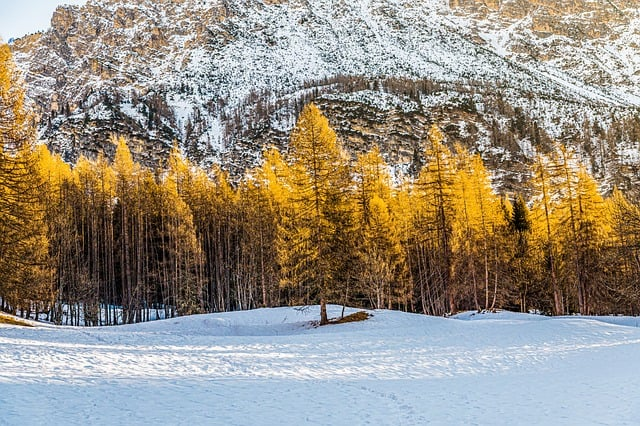

In [5]:
image

In [6]:
# load questions embeddings
vocab=pd.read_pickle(f'embeddings/gte-small_question_embeddings_{dataset_name}.pickle')
df = pd.DataFrame(vocab)

In [7]:
df.head()

,image_id,question,question_id,vectors
17,393224,Is the man smiling?,393224000,"[-0.069836184, 0.019357149, 0.04340169, 0.0339..."
18,393224,What is the business man doing in the picture?,393224001,"[-0.025111571, -0.009833769, 0.0015447852, -0...."
19,393224,Does his tie pair well with his suit?,393224002,"[-0.07449399, 0.019070547, 0.0034990474, -0.01..."
20,393224,Does the man look happy?,393224003,"[-0.05745519, 0.036568183, 0.044776026, 0.0345..."
21,393224,Is this photo in color?,393224004,"[0.020771673, -0.04682064, -0.011911302, 0.028..."


In [8]:
df

,image_id,question,question_id,vectors
17,393224,Is the man smiling?,393224000,"[-0.069836184, 0.019357149, 0.04340169, 0.0339..."
18,393224,What is the business man doing in the picture?,393224001,"[-0.025111571, -0.009833769, 0.0015447852, -0...."
19,393224,Does his tie pair well with his suit?,393224002,"[-0.07449399, 0.019070547, 0.0034990474, -0.01..."
20,393224,Does the man look happy?,393224003,"[-0.05745519, 0.036568183, 0.044776026, 0.0345..."
21,393224,Is this photo in color?,393224004,"[0.020771673, -0.04682064, -0.011911302, 0.028..."
...,...,...,...,...
443626,262103,Is there a car behind the dog?,262103001,"[-0.02092094, -0.02924376, 0.044203382, 0.0214..."
443627,262103,What kind of animal is this?,262103002,"[0.025452431, -0.028718034, 0.02989976, 0.0499..."
443717,393195,Why is she smiling?,393195000,"[-0.06631484, -0.00046529117, 0.053128082, 0.0..."
443718,393195,Is the woman wearing a hat?,393195001,"[-0.014911266, -0.0013862476, 0.03993723, -0.0..."


## Questions Recuperation

In [9]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.45, min_samples=5)

## Model 1: RNet SIZE_SET

In [12]:
num_images_rec=50
num_questions_rec=13

In [13]:
df_scores_rnet_sizeset = calculate_similarity(image, 'tags', 'size_set', coco, dataset_name, 'RNet|0.7|0.5')

In [14]:
questions_rec=questions_recuperation(df,df_scores_rnet_sizeset,num_images_rec,num_questions_rec)

In [15]:
questions_rec

['What is the person holding?',
 'What position is this man playing?',
 'What is this girl holding?',
 'What sport is being played in this picture?',
 'What is the man holding?',
 'What sport is this?',
 'What is the person in this picture holding?',
 'What sport is the man playing?',
 'What is the man in gray holding?',
 'What sport are they playing?',
 'What does the man in front have on his left arm?',
 'What is the guy holding in his hand?',
 'What does the man have in his hand?']

## Model 2: RNet SET

In [17]:
num_images_rec=50
num_questions_rec=13

In [18]:
df_scores_rnet_set = calculate_similarity(image, 'tags', 'set', coco, dataset_name, 'RNet|0.7|0.5')

In [19]:
questions_rec=questions_recuperation(df,df_scores_rnet_set,num_images_rec,num_questions_rec)
questions_rec

['What is the person holding?',
 'What position is this man playing?',
 'What is this girl holding?',
 'What sport is being played in this picture?',
 'What is the man holding?',
 'What sport is this?',
 'What is the person in this picture holding?',
 'What sport is the man playing?',
 'What is the man in gray holding?',
 'What sport are they playing?',
 'What does the man in front have on his left arm?',
 'What is the guy holding in his hand?',
 'What does the man have in his hand?']

## Model 3: Embbedings DENSENET 

In [10]:
num_images_rec=50
num_questions_rec=20

In [11]:
df_scores_emb_densenet = calculate_similarity(image, 'embeddings', 'cos', coco, dataset_name,'densenet')

In [12]:
questions_rec=questions_recuperation(df,df_scores_emb_densenet,num_images_rec,num_questions_rec)
questions_rec

['Do any of the people in the photo appear over the age of 40?',
 'Is it winter?',
 'What color is the sky?',
 'What type of animals are they?',
 'Is it late in the day?',
 'What time is it?',
 'Where is the skier?',
 'Is that a black sheep in the field?',
 'Is there snow in the photo?',
 'What is the weather?',
 'What are these animals?',
 'Is it daytime?',
 'What time does the clock say?',
 'Is the skier at the top or bottom of the mountain?',
 'How many sheep are in the pasture?',
 'Is this a winter month?',
 'Is it a sunny day?',
 'What animal is pictured?',
 'What kind of day is it?',
 'What time is on the clock?']

## Model 4: Pixel NMRSE

In [13]:
num_images_rec=50
num_questions_rec=20

In [14]:
df_scores_pix_nmrse= calculate_similarity(image, 'pixels', 'nrmse', coco, dataset_name)

In [15]:
questions_rec=questions_recuperation(df,df_scores_pix_nmrse,num_images_rec,num_questions_rec)
questions_rec

['What type of animals are they?',
 'Is there water in the toilet?',
 'What color is the ground?',
 'How many animals are standing?',
 'Are the zebras wild or captive?',
 "What color is on the sheep's back?",
 'Are all these kites the same?',
 'Is the sun shining?',
 'What are these animals?',
 'Is there a toilet seat lid?',
 'What color is the room?',
 'How many animals are there?',
 'Is the zebra running?',
 'How many sheep can you see?',
 'What color are the kites?',
 'Is this taken on a sunny day?',
 'What animal is pictured?',
 'Is the toilet usable?',
 'What color are the walls?',
 'How many bears are there?']

In [16]:
num_images_rec=50
num_questions_rec=10

all_images = ['animals_1', 'animals_2', 'animals_3', 'food_1', 'food_2', 'food_3', 'landscape_1', 'room_1', 'room_2', 'room_3', 'sport_1', 'sport_2',
              'street_1', 'street_2', 'street_3', 'street_4', 'technology_1', 'transport_1', 'transport_2', 'transport_3']
all_images = ['landscape_1']
for img in all_images:
    file = open('./test_questions.txt', 'a')
    path = "../evaluation/evaluation_images/"+img+".jpg"
    image = Image.open(path)
    file.write(img+'\n\n')
        
    df_scores_emb_densenet = calculate_similarity(image, 'embeddings', 'cos', coco, dataset_name,'densenet')
    questions_rec=questions_recuperation(df,df_scores_emb_densenet,num_images_rec,num_questions_rec)
    file.write('Embed\n')
    file.write(str(questions_rec)+'\n')
    
    df_scores_pix_nmrse= calculate_similarity(image, 'pixels', 'nrmse', coco, dataset_name)
    questions_rec=questions_recuperation(df,df_scores_pix_nmrse,num_images_rec,num_questions_rec)
    file.write('Pixel\n')
    file.write(str(questions_rec)+'\n\n')
    
    df_scores_rnet_sizeset = calculate_similarity(image, 'tags', 'size_set', coco, dataset_name, 'RNet|0.7|0.5')
    questions_rec=questions_recuperation(df,df_scores_rnet_sizeset,num_images_rec,num_questions_rec)
    file.write('RNet_size_set\n')
    file.write(str(questions_rec)+'\n')
    
    df_scores_rnet_set = calculate_similarity(image, 'tags', 'set', coco, dataset_name, 'RNet|0.7|0.5')
    questions_rec=questions_recuperation(df,df_scores_rnet_set,num_images_rec,num_questions_rec)
    file.write('RNet_set\n')
    file.write(str(questions_rec)+'\n')

    file.close()


In [ ]:
file = open('./test_questions.txt', 'a')

## Baseline

In [10]:
from sklearn.cluster import DBSCAN

In [35]:
len(df)

26987

#### With clusters

In [27]:
dbscan = DBSCAN(eps=0.45, min_samples=90)
X = np.array(df['vectors'])
df_new = pd.DataFrame([i for i in X], columns=[i for i in range(len(X[0]))])
clusters = dbscan.fit_predict(df_new)

In [28]:
df['clusters'] = clusters
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4])

In [30]:
baseline_questions = []

for i in np.unique(clusters):
    if i >=0:
        print('-----------------------------------------------------------------------------')
        cluster = df[df['clusters']==i]
        centroide = calcular_centroide(cluster['vectors'])
        distances = []
        for v in cluster['vectors']:
            distances.append(euclidean_distance(centroide, v))
        cluster['distances'] = distances 
        print(len(cluster))

        cluster.sort_values(by = 'distances', inplace = True)
        print(cluster[['question','distances']][:5])
        print(cluster['question'].unique().tolist()[:5])
        
        baseline_questions.append(cluster['question'].unique().tolist()[0])
        baseline_questions.append(cluster['question'].unique().tolist()[1])

-----------------------------------------------------------------------------
14630
                                                 question  distances
9166                         What airline should you fly?   1.690868
47132                    How are these vegetables cooked?   1.697032
414385                  Is this good food for a diabetic?   1.710108
19371   How many toppings does this pizza have on it's...   1.746619
197251                   How much cheese is on the pizza?   1.747400
['What airline should you fly?', 'How are these vegetables cooked?', 'Is this good food for a diabetic?', "How many toppings does this pizza have on it's crust?", 'How much cheese is on the pizza?']
-----------------------------------------------------------------------------
89
                                               question  distances
53011                    Is there a shark in the water?   2.144994
381399                    Are there waves in the water?   2.195108
318492               

In [31]:
baseline_questions

['What airline should you fly?',
 'How are these vegetables cooked?',
 'Is there a shark in the water?',
 'Are there waves in the water?',
 'What game is on the TV?',
 'Is the TV set new?',
 'Is this a kitchen?',
 'Is there a bathtub in this shower?',
 'What is the purpose of the item under the umbrella?',
 'What is the white umbrella being used for?']

#### Without clusters

In [14]:
centroide = calcular_centroide(df['vectors'])
distances = []
for v in df['vectors']:
    distances.append(euclidean_distance(centroide, v))
df['distances'] = distances 

df.sort_values(by = 'distances', inplace = True)
print(df[['question','distances']][:10])

baseline_questions = df['question'].unique().tolist()[:10]

print(baseline_questions)

                                 question  distances
291536   Are there people in the picture?   0.379381
150030   Are there people in the picture?   0.379381
61208    Are there people in the picture?   0.379381
296429   Are there people in the picture?   0.379381
416162   Are there people in the picture?   0.379381
361878          Are people in this photo?   0.380353
307271  Is there a person in the picture?   0.380903
105793  Is there a person in the picture?   0.380903
71085   Is there a person in the picture?   0.380903
427500  Is there a person in the picture?   0.380903
['Are there people in the picture?', 'Are people in this photo?', 'Is there a person in the picture?', 'What activity is taking place in this picture?', 'Is there a person in the photo?', 'What object appears throughout this picture?', 'What is happening in this picture?', 'What is the person doing in this picture?', "What's happening in this picture?", 'Are they outside?']
